**Описание проекта**

Контекст:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


# Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

*   Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
*   Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
*   Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Описание данных для первой части:

**/datasets/hypothesis.csv**
*   Hypothesis — краткое описание гипотезы;
*   Reach — охват пользователей по 10-балльной шкале;
*   Impact — влияние на пользователей по 10-балльной шкале;
*   Confidence — уверенность в гипотезе по 10-балльной шкале;
*   Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Настройки
# отображение всех колонок таблиц
pd.set_option('display.max_columns', None)
# ширина колонок при выводе
pd.set_option('display.max_colwidth', 1000)

 ## Загрузка данных

In [ ]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [ ]:
# вывода информации о датафрейме
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


## Предобработка данных

In [ ]:
print('Наличие дубликатов: {}'.format(hypothesis.duplicated().sum()))
print('-' * 50)
print('Наличие пропусков:')
print(hypothesis.isna().sum())
print('-' * 50)
print('Стат.данные датафрейма:')
display(hypothesis.describe())

Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
--------------------------------------------------
Стат.данные датафрейма:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [ ]:
# приведем названия столбцов к "змеиному" стилю
hypothesis.columns= hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Вывод загрузки и предобработки данных

*   В датафрейм 'hypothesis' загрузили данные из детасета 'hypothesis.csv'
*   Предобработка данных показала:
  *   пропуски в данных отсутствуют
  *   дубликаты отсутствуют
  *   типы данных корректировки не требуют
  *   аномальные значения в данных отсутствуют

*   Названия столбцов приведены к "змеиному" стилю

## Применим фреймворк ICE для приоритизации гипотез

In [ ]:
# Добавим столбец со способом приоритизации гипотез ICE
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
display(hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


## Применим фреймворк RICE для приоритизации гипотез

In [ ]:
# Добавим столбец со способом приоритизации гипотез RICE
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
display(hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


## Вывод приоритизации гипотез
Параметр Reach (охват пользователей) из метода RICE изменил всю приоритетность, полученную по методу ICE:

*   без учета параметра Reach на первом месте идет акция "Скидка на товар в день рождения	", но добавленный параметр охвата пользователей естественно понизил приоритет этой акции, так как, очевидно, охват её минимальный (по сравнению с другими гипотезами увеличения выручки)
*   по методу RICE стали более приоритетными гипотезы "добавлении формы подписки на все основные страницы ресурса", "добавлении блоков рекомендаций товаров" и "предложение об изменении структуры категорий"
*   без изменений осталась позиция гипотез "добавлении баннеров с актуальными акциями на главную страницу" и "идея с изменением цвета фона главной страницы"


# Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:

1.   Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2.   Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.   Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.   Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5.   Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6.   Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.   Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.   Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.   Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.   Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11.   Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.   Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13.   Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.   Примите решение по результатам теста и объясните его. Варианты решений:
*   Остановить тест, зафиксировать победу одной из групп.
*   Остановить тест, зафиксировать отсутствие различий между группами.
*   Продолжить тест.

## Описание данных для второй части:

**/datasets/orders.csv**
*   transactionId — идентификатор заказа;
*   visitorId — идентификатор пользователя, совершившего заказ;
*   date — дата, когда был совершён заказ;
*   revenue — выручка заказа;
*   group — группа A/B-теста, в которую попал заказ.

**/datasets/visitors.csv**
*   date — дата;
*   group — группа A/B-теста;
*   visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка данных

In [ ]:
try:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [ ]:
# вывод информации о датафреймах
display(orders.sample(10))
display(orders.info())
print('-' * 50)
display(visitors.sample(10))
display(visitors.info())

,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
599,3627506669,3177606451,2019-08-09,2840,A
590,3702128013,237748145,2019-08-20,1290,A
1038,2983450240,1605520752,2019-08-31,27985,B
725,2309447140,2913441496,2019-08-07,1490,B
326,4185696070,235366767,2019-08-28,780,A
886,51443164,4278982564,2019-08-05,24744,A
805,2726113349,1801183820,2019-08-05,100,B
541,2425764900,3713138051,2019-08-20,2285,B
549,4243941421,1367935136,2019-08-29,35485,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

--------------------------------------------------


,date,group,visitors
30,2019-08-31,A,699
29,2019-08-30,A,490
50,2019-08-20,B,560
3,2019-08-04,A,717
51,2019-08-21,B,656
36,2019-08-06,B,655
37,2019-08-07,B,709
48,2019-08-18,B,737
23,2019-08-24,A,395
12,2019-08-13,A,748


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

## Предобработка данных

In [ ]:
print('Наличие дубликатов: {}'.format(orders.duplicated().sum()))
print('-' * 50)
print('Наличие пропусков:')
print(orders.isna().sum())
print('-' * 50)
print('Стат.данные датафрейма:')
display(orders.describe())

Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
--------------------------------------------------
Стат.данные датафрейма:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [ ]:
print('Наличие дубликатов: {}'.format(visitors.duplicated().sum()))
print('-' * 50)
print('Наличие пропусков:')
print(visitors.isna().sum())
print('-' * 50)
print('Стат.данные датафрейма:')
display(visitors.describe())

Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков:
date        0
group       0
visitors    0
dtype: int64
--------------------------------------------------
Стат.данные датафрейма:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [ ]:
# корректировка названия столбцов датафрейма "orders"
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace = False)
# приведем столбцы с датами в датафреймах к типу datetime
orders['date']= pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date']= pd.to_datetime(visitors['date'], format='%Y-%m-%d')

### Вывод загрузки и предобработки данных

*   В датафреймы 'orders' и 'visitors' загрузили данные.csv'
*   Предобработка данных показала:
  *   пропуски в данных отсутствуют
  *   дубликаты отсутствуют
  *   аномальные значения в данных отсутствуют

*   Названия столбцов приведены к "змеиному" стилю
*   Cкорректировали типы данных в столбцах "data"

In [ ]:
double_group_users = np.intersect1d(orders[orders['group'] == 'A']['visitor_id'].unique(), \
                                    orders[orders['group'] == 'B']['visitor_id'].unique())
print('Количество пользователей вошедших в обе группы -', len(double_group_users))

Количество пользователей вошедших в обе группы - 58


In [ ]:
orders = orders[np.logical_not(orders['visitor_id'].isin(double_group_users))]

## График кумулятивной выручки по группам

Создадим датафрейм dates_groups с уникальными парами значений 'date' и 'group', таблицы orders, удалим дубликаты методом drop_duplicates()

In [ ]:
# массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Объявим переменную orders_aggregated, содержащую:
*   дату
*   группу A/B-теста
*   число уникальных заказов в группе теста по указанную дату включительно
*   число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно
*   суммарную выручку заказов в группе теста по указанную дату включительно

In [ ]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and \
   (orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique','visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1) \
    .sort_values(by=['date','group'])
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Объявим переменную visitors_aggregated, содержащую:
*   дату
*   группу A/B-теста
*   количество уникальных посетителей в группе теста по указанную дату включительно

In [ ]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and\
                    (visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                    .sort_values(by=['date','group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Определим переменную cumulative_data, объединив orders_aggregated и visitors_aggregated по колонкам 'date' и 'group'. Присвоим столбцам cumulative_data названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [ ]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on = ['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Объявим переменные cumulative_revenue_a и cumulative_revenue_b, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Построим графики кумулятивной выручки по дням по группам

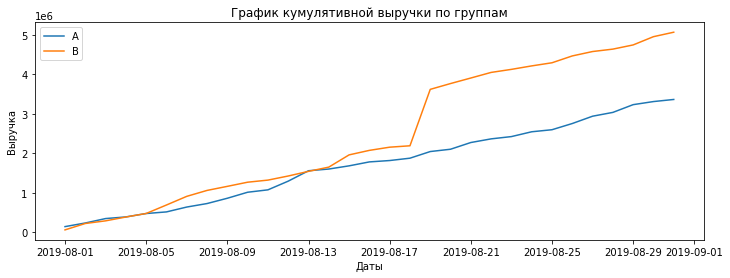

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,4))
# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам', size=12)
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.legend()

### Вывод
Из графика видно, что кумулятивная выручка группы B выше и изменения в группе В пошли на пользу, будем продолжать исследование. В группе B виден значительный скачок в районе 2019.08.18 - 2019.08.19, похожий на аномалию.

## График кумулятивного среднего чека по группам

Для построения графика среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

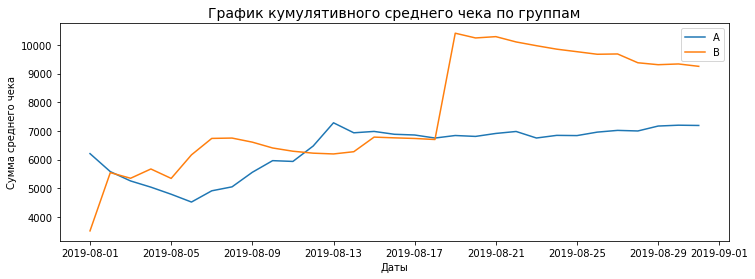

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам', size=14)
plt.xlabel("Даты")
plt.ylabel("Сумма среднего чека")
plt.legend()

### Вывод
Кумулятивное значение среднего чека сегмента В сильно также выросло в районе 2019.08.18 - 2019.08.19 числа.
Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

## График относительного изменения кумулятивного среднего чека группы B к группе A

в переменной merg_cum_rev объединим таблицы cumulative_revenue_a и cumulative_revenue_b

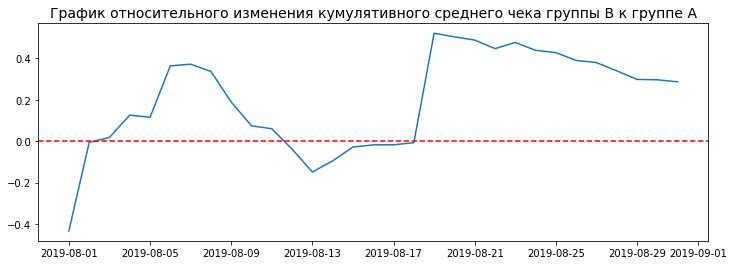

In [ ]:
# собираем данные в одном датафрейме
merg_cum_rev = cumulative_revenue_a.merge(cumulative_revenue_b, left_on = 'date',\
                                          right_on = 'date', how = 'left', suffixes=['_a', '_b'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,4))
plt.plot(merg_cum_rev['date'], (merg_cum_rev['revenue_b'] / merg_cum_rev['orders_b']) / (merg_cum_rev['revenue_a'] / merg_cum_rev['orders_a']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size=14)

# добавляем ось X
plt.axhline(y = 0, color = 'red', linestyle = '--')

### Вывод
На графике видны значительные колебания относительного изменения кумулятивного среднего чека по все видимости связанные с аномальным заказами.

## График кумулятивного среднего количества заказов на посетителя по группам

Добавим в cumulative_data столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

Объявим переменные cumulative_data_a и cumulative_data_b, в которых сохраним данные о заказах в сегментах A и B соответственно.

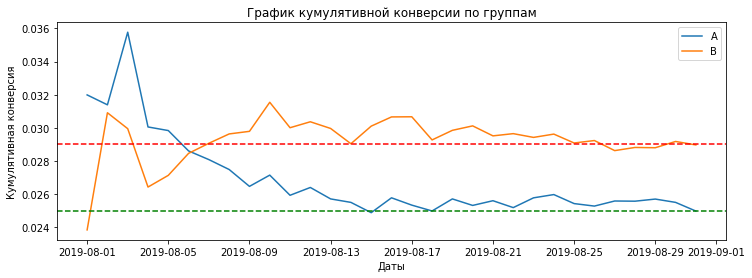

In [ ]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# конверсия группы A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

# конверсия группы B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize = (12,4))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label = 'A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label = 'B')

plt.axhline(y = 0.025, color = 'green', linestyle = '--')
plt.axhline(y = 0.029, color = 'red', linestyle = '--')

plt.title('График кумулятивной конверсии по группам', size = 12)
plt.xlabel("Даты")
plt.ylabel("Кумулятивная конверсия")
plt.legend()

### Вывод
В начале теста конверсии обеих групп сильно колебались. Впоследствии можем наблюдать снижение конверсии группы А, а в группе В конверсия стала больше.

К концу теста колебания по конверсии по сегментам составляют значения:
группа А - около значения 0.025; группа В около значения 0,029

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

В merg_cum_conversions объединим таблицы cumulative_data_a и cumulative_data_b

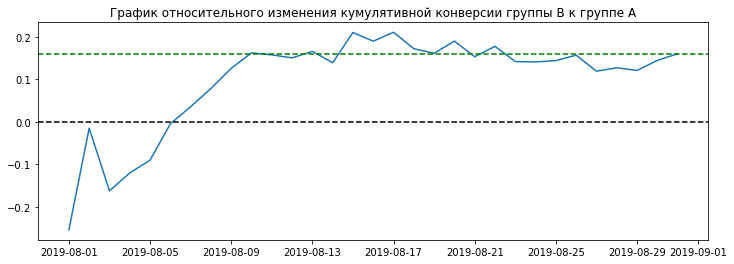

In [ ]:
merg_cum_conversions = cumulative_data_a[['date','conversion']] \
.merge(cumulative_data_b[['date','conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

plt.figure(figsize=(12,4))
plt.plot(merg_cum_conversions['date'], merg_cum_conversions['conversionB'] / merg_cum_conversions['conversionA'] - 1, \
         label = "Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', size = 12)

plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.16, color = 'green', linestyle = '--')

### Вывод
Конверсия группы B относительно конверсии группы А колеблется вокруг значения 0.14, значительные колебания отсутствуют, что говорит, что конверсия группы В выше конверсии группы А, подтверждая предыдущий график

## Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям

In [ ]:
orders_per_user = orders.drop(['group', 'revenue', 'date'], axis = 1) \
  .groupby('visitor_id', as_index = False) \
  .agg({'transaction_id' : pd.Series.nunique})
orders_per_user.columns = ['visitor_id','orders']

print(orders_per_user.sort_values(by = 'orders', ascending = False).head(10))

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


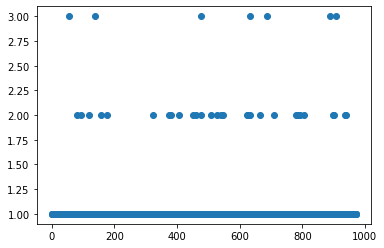

In [ ]:
x_values = pd.Series(range(0, len(orders_per_user)))
plt.scatter(x_values, orders_per_user['orders'])

### Вывод
Большинство покупателей заказывали только один раз. Доля пользователей сделавших 2 или 3 заказа тоже значительна. Необходимо посчитать выборочные перцентили количества заказов на одного пользователя, что бы определить, какое количество заказов считать аномалиями.

## Расчет 95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
print(np.percentile(orders_per_user['orders'], [95, 99]))

[1. 2.]


### Вывод
Не более 5% пользователей совершали больше одного заказа. И не более 1% пользователей — больше двух заказов.
Пользователи совершившие больше одного заказов будем считать аномальными значениями.

## Точечный график стоимостей заказов

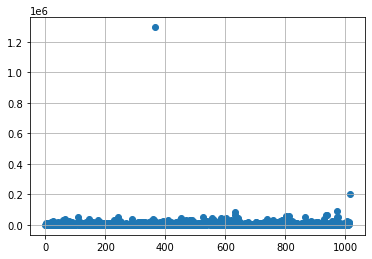

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()

### Вывод
Значительная аномалия бросается сразу в глаза. Но для того, чтобы точно определить какие значения стоимости заказа считать за аномалию, посчитаем 95-й и 99-й перцентили.

## Расчет 95-й и 99-й перцентили стоимости заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


### Вывод
Не более 5 % заказов на сумму 26785, не более 1 % - 53903.
Все, что за 95 перцентилем, т.е заказы дороже 26785, можно считать аномалиями.

## Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [ ]:
conversion = (orders.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
display(conversion)

,group,orders,visitors,conversion
0,A,468,18736,0.024979
1,B,548,18916,0.028970


Воспользуемся Z-критерием для разности двух долей:
*   H0: Конверсия в группе A равна конверсии в группе B
*   H1: Конверсия в группе A не равна конверсии в группе B


In [ ]:
alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('P-value: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('-' * 50)
#Относительное различие конверсий
print('Относительная разница конверсий группы В к группе А: ','{0:.3f}'.format(p2/p1-1))

P-value:  0.016851380434703023
Отвергаем нулевую гипотезу
--------------------------------------------------
Относительная разница конверсий группы В к группе А:  0.160


### Вывод
Анализ «сырых» данных показывает, что в конверсии между группами есть статистически значимые различия.

## Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Воспользуемся критерием Манна-Уитни
*   H0: Средний чек A равен среднему чеку группы B
*   H1: Средний чек A не равен среднему чеку группы B






In [ ]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])
pvalue = results.pvalue
print('P-value: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

P-value:  0.8294908998149533
Не получилось отвергнуть H0: вывод о различии сделать нельзя


### Вывод
Анализ «сырых» данных сообщает, что в средних чеках между группами отсутствуют статистически значимые различия.

## Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму от 26785.

In [ ]:
percentile_orders = np.percentile(orders_per_user['orders'], 95)
outliers_orders_num = orders_per_user[orders_per_user['orders'] >= percentile_orders]['visitor_id'].to_list()
percentile_orders_revenue = np.percentile(orders['revenue'], 95)
outliers_revenue = orders[orders['revenue'] > percentile_orders_revenue]['visitor_id']
orders_clean = orders[~orders['visitor_id'].isin(outliers_orders_num)]
orders_clean = orders[~orders['visitor_id'].isin(outliers_revenue)]
orders_clean

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [ ]:
conversion_clear = (orders_clean.groupby('group') \
  .agg({'transaction_id':'count'}) \
  .rename(columns={'transaction_id':'orders'})) \
  .join((visitors.groupby('group') \
  .agg({'visitors':'sum'}))).reset_index()

Воспользуемся Z-критерием для разности двух долей:
*   H0: Конверсия в группе A равна конверсии в группе B
*   H1: Конверсия в группе A не равна конверсии в группе B

In [ ]:
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('P-value: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('-' * 50)
#Относительное различие конверсий
print('Относительная разница конверсий группы В к группе А: ','{0:.3f}'.format(p2/p1-1))

P-value:  0.023565080954461193
Отвергаем нулевую гипотезу
--------------------------------------------------
Относительная разница конверсий группы В к группе А:  0.155


### Вывод
Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

## Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Воспользуемся критерием Манна-Уитни
*   H0: Средний чек A равен среднему чеку группы B
*   H1: Средний чек A не равен среднему чеку группы B





In [ ]:
alpha = 0.05
results = st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], \
                          orders_clean[orders_clean['group']=='B']['revenue'])
pvalue = results.pvalue
print('P-value: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

P-value:  0.7413393336907831
Не получилось отвергнуть H0: вывод о различии сделать нельзя


### Вывод
Как и в случае с сырыми данными, вывод о различии средних чеков между сегментами сделать нельзя.

## Общий вывод
По результату исследования можно сделать неоднозначные выводы:
*   по графику кумулятивной выручки группа B лучше группы А
*   по графику кумулятивного среднего чека, так же группа А лучше группы В,
*   по графику кумулятивной конверсии группа B лучше группы А,
*   при сырых данных различия в конверсии между группами имеет статистическую значимость, так же как и при очищенных данных
*   при сырых данных, так же как и при очищенных статистическая значимость различий в среднем чеке заказа между группами отсутствует, группы А и В не отличаются, не смотря на значительное отличие в относительных величинах

В результате можем сделать вывод, что конверсия группы В выше, чем конверсия группы А, в то время как средний чек между группами не отличается. Очистка данных от аномалий не поменяла картину.

Судя по установивишимся значениям, не стоит продолжать тест, так как это не поменяет результатов в целом.